In [1]:
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
word={'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,'g':6,'h':7,'i':8,'j':9,'k':10,'l':11,'m':12,'n':13,'o':14,'p':15,'q':16,'r':17,'s':18,'t':19,'u':20,'v':21,'w':22,'x':23,'y':24,'z':25}

In [3]:
# load changsung's wav data
def load_data_cs_wav():

    data_x_1=[]
    data_y_1=[]
    test_x_1=[]
    test_y_1=[]

    for j in range(0,100):
        for i in ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']:
            
            try:
                f = open("/Users/Solomon/Desktop/matrixWav2/cs/"+i+"/"+i+str(j)+".txt")
                line = f.readline()
                temp=line.split(",")
                f.close()
         
            except:
                continue
                        
            temp_np=np.array(list(map(float, temp)))
            temp_np=temp_np.reshape(1248,24,1) # not resize
            
            if j in range(80,100):
                test_x_1.append(temp_np)
                test_y_1.append(word[i])
            
            else:
                data_x_1.append(temp_np)
                data_y_1.append(word[i])            

                
    test_x_1=np.array(test_x_1)
    test_y_1=np.array(test_y_1)
    data_x_1=np.array(data_x_1)
    data_y_1=np.array(data_y_1)

#     test_y_1 = to_categorical(test_y_1,num_classes=26)
#     data_y_1 = to_categorical(data_y_1,num_classes=26)

    return data_x_1, test_x_1, data_y_1, test_y_1

In [4]:
data_x, test_x, data_y, test_y = load_data_cs_wav()

In [5]:
print(data_x.shape)
print(test_x.shape)
print(data_y.shape)
print(test_y.shape)

(2064, 1248, 24, 1)
(520, 1248, 24, 1)
(2064,)
(520,)


In [6]:
data_x= data_x.reshape(data_x.shape[0],-1)
test_x= test_x.reshape(test_x.shape[0],-1)

In [7]:
print(data_x.shape)
print(test_x.shape)

(2064, 29952)
(520, 29952)


### K-means Clustering

### Elements

In [8]:
number_cluster = 26 # 알파벳의 개수

number_data = data_x.shape[0]
number_feature = data_x.shape[1]

number_iteration = 10

### Functions

In [9]:
def compute_centroid(feature, label_feature, value_label):
    
    centroid = np.zeros(number_feature)
    cnt = 0
    for i, each in enumerate(feature):
        if label_feature[i] == value_label:
            centroid += each
            cnt += 1
    centroid /= cnt
    
    return centroid

In [10]:
# from scipy.spatial import distance

In [11]:
def compute_distance(feature, center):
    
    temp = feature - center # broadcasting
    distance = np.sum(np.power(temp, 2), axis=1)
    
    return distance

In [12]:
def compute_label(distance, number_data):
    
    index_label_feature = np.zeros(number_data)
    
    for i in range(number_data):
        index_label_feature[i] = np.argmin(distance[i])
        
    return index_label_feature

### Initialize label_feature

In [13]:
# data_x의 레이블인 data_y로 초기화하여 처음에 중심점이 위의 Initialize Centroids처럼 되도록 설정한다
label_feature = data_y

### Training

In [14]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))

loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

feature = data_x

for i in range(number_iteration):

    for j in range(number_cluster):
        
        cluster_feature_num = len(np.where(label_feature == j)[0])
        if cluster_feature_num != 0:
            centroid[j] = compute_centroid(feature, label_feature, j)
            distance[:,j] = compute_distance(feature, centroid[j])
    
    # update label_feature
    label_feature = compute_label(distance, number_data)
    centroid_iteration[i] = centroid

    # compute the loss
    loss = 0
    for j in range(number_cluster):
        cluster_feature = np.where(label_feature == j)[0]
        each_distance = compute_distance(feature[cluster_feature], centroid[j])
        loss += np.sum(each_distance)

    loss /= number_data
    loss_iteration[i] = loss
    
    print("iteration=", i, ", loss=", loss)

iteration= 0 , loss= 1437374.7899712664
iteration= 1 , loss= 1419545.5475315857
iteration= 2 , loss= 1412158.3439245035
iteration= 3 , loss= 1405479.8368232965
iteration= 4 , loss= 1398982.1952839245
iteration= 5 , loss= 1385178.1059924664
iteration= 6 , loss= 1379608.3011398967
iteration= 7 , loss= 1378984.5424468566
iteration= 8 , loss= 1378914.0448220402
iteration= 9 , loss= 1378914.0448220402


### Ploting

In [15]:
import matplotlib.pyplot as plt

In [16]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss')

    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.plot(np.arange(number_iteration), loss_iteration, '-', color='red')

    plt.tight_layout()
    plt.show()

In [17]:
def plot_centroid(centroid_iteration):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    
    initial_centroids = centroid_iteration[0]
    plt.scatter(initial_centroids[:,0], initial_centroids[:,1], marker='o', s=30, color='blue', label='initial')

    cluster_num = centroid_iteration.shape[1]
    for i in range(cluster_num):
        plt.plot(centroid_iteration[:,i,0], centroid_iteration[:,i,1], '-', label='cluster{}'.format(i))
        
    final_centroids = centroid_iteration[-1]
    plt.scatter(final_centroids[:,0], final_centroids[:,1], marker='s', s=30, color='red', label='final')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

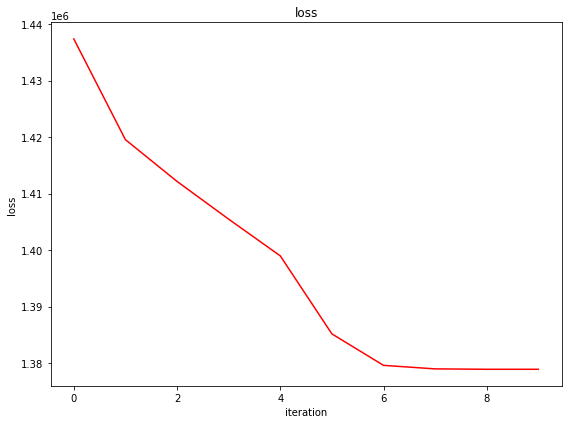

In [18]:
plot_loss_curve(loss_iteration)

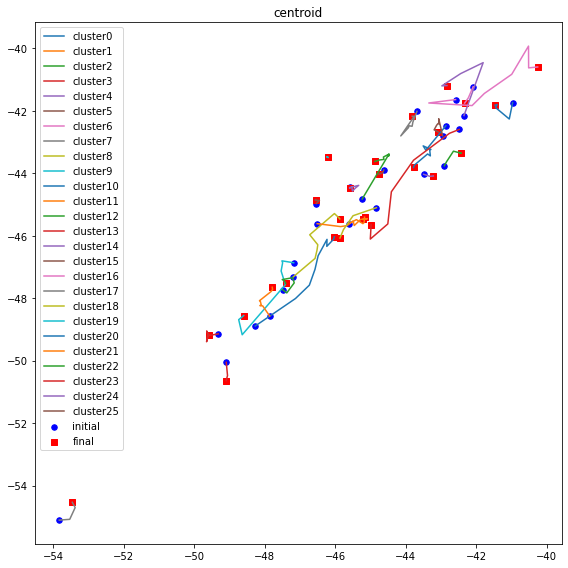

In [19]:
plot_centroid(centroid_iteration)

### Evaluation

In [20]:
# 최종 중심점 - centroid
print(centroid)

feature = test_x
number_test_data = test_x.shape[0] 
result = np.zeros(number_test_data)

test_distance = np.zeros(shape=(number_test_data, number_cluster))

for j in range(number_cluster):
    cluster_feature_num = len(np.where(label_feature == j)[0])
    if cluster_feature_num != 0:
        test_distance[:,j] = compute_distance(feature, centroid[j])
    
# update label_feature
result = compute_label(test_distance, number_test_data)

[[-43.78020854 -43.81480254 -43.29325363 ... -71.0451165  -70.97457526
  -70.93916554]
 [-45.17159755 -45.40489287 -45.58078276 ... -71.75023095 -71.74052092
  -71.8138481 ]
 [-42.43690007 -43.35540629 -43.30644545 ... -66.77509576 -66.95060942
  -66.9485378 ]
 ...
 [-49.09759324 -50.64020135 -49.95055118 ... -72.63244179 -72.51746361
  -72.4717969 ]
 [-45.5942618  -44.47439332 -44.73748567 ... -70.91288763 -70.52576985
  -70.24877459]
 [-44.76373361 -44.03227329 -44.50512757 ... -71.06154751 -71.394274
  -71.44270168]]


In [21]:
accuracy_score(result, test_y)

0.7230769230769231

### Initialize Centroids

In [22]:
# 우리는 이미 각 데이터가 속하는 레이블을 알고 있으므로
# 이를 바탕으로 각 레이블 별 데이터들의 중심을 구해 초기 중심점으로 설정

centroids = np.zeros(shape=(number_cluster, number_feature))
number_label = np.zeros(number_cluster)

for i, data in enumerate(data_x):
    label = data_y[i]
    centroids[label] += data
    number_label[label] += 1

for i, centroid in enumerate(centroids):
    centroid /= number_label[i]

In [23]:
centroids

array([[-42.86217584, -42.47692695, -42.61891138, ..., -70.87655125,
        -70.95061299, -71.04935618],
       [-45.61665409, -45.61422906, -45.46531947, ..., -71.43911869,
        -71.40485322, -71.46578341],
       [-42.90768357, -43.75992257, -43.6384705 , ..., -70.59286605,
        -70.73431345, -70.59190534],
       ...,
       [-49.09427927, -50.05405426, -49.48689641, ..., -72.48918767,
        -72.39055837, -72.37368516],
       [-45.58372898, -44.45508497, -45.00595036, ..., -71.34507097,
        -70.9614118 , -70.68170884],
       [-44.6235973 , -43.89124295, -44.40143623, ..., -71.13379751,
        -71.45335011, -71.5046091 ]])

In [24]:
feature = test_x
number_test_data = test_x.shape[0] 
result = np.zeros(number_test_data)

test_distance = np.zeros(shape=(number_test_data, number_cluster))

for j in range(number_cluster):
    cluster_feature_num = len(np.where(label_feature == j)[0])
    if cluster_feature_num != 0:
        test_distance[:,j] = compute_distance(feature, centroids[j])
    
# update label_feature
result = compute_label(test_distance, number_test_data)

In [25]:
accuracy_score(result, test_y)

0.7884615384615384

## Scikit-Learn: K-means Clustering

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 26)
kmeans.fit(data_x)

KMeans(n_clusters=26)

In [27]:
kmeans.labels_

array([ 2,  9,  6, ..., 10, 21, 20], dtype=int32)

In [28]:
pred = kmeans.predict(test_x)

In [29]:
accuracy_score(pred, test_y)

0.011538461538461539

## K-means Clustering with Feature Scaling

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
model = KMeans(n_clusters = 26)
pipeline = make_pipeline(scaler, model)

In [31]:
pipeline.fit(data_x)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=26))])

In [32]:
pred = pipeline.predict(data_x)
accuracy_score(pred, data_y)

0.0188953488372093

In [33]:
pred = pipeline.predict(test_x)
accuracy_score(pred, test_y)

0.046153846153846156